Here we are using regularization techniques to reduce overfitting

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, make_moons

In [2]:
zero_one_colourmap = ListedColormap(('red', 'green'))
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 7

# Generate Data

In [3]:
np.random.seed(800)

In [7]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)
# make_moons() method will generate 100 samples with 2 imput featrues and 1 target variable

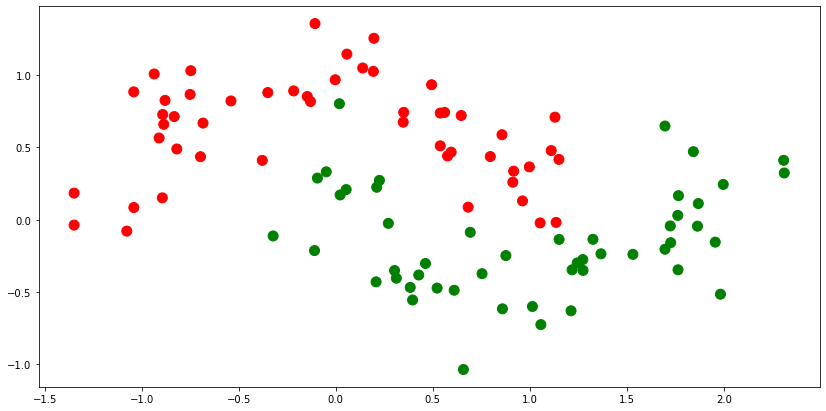

In [5]:
plt.scatter(X[:,0],X[:,1], 
            c=y, s=100, 
            cmap = zero_one_colourmap)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

# Overfit Model

In [8]:
# Structure of Neural Nw
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=4000, verbose=0)

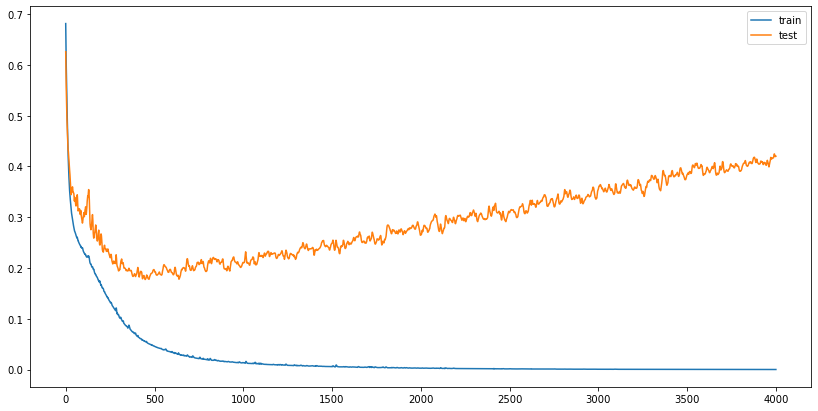

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Below is a clear ex of everfitting as training loss increases after a certain point

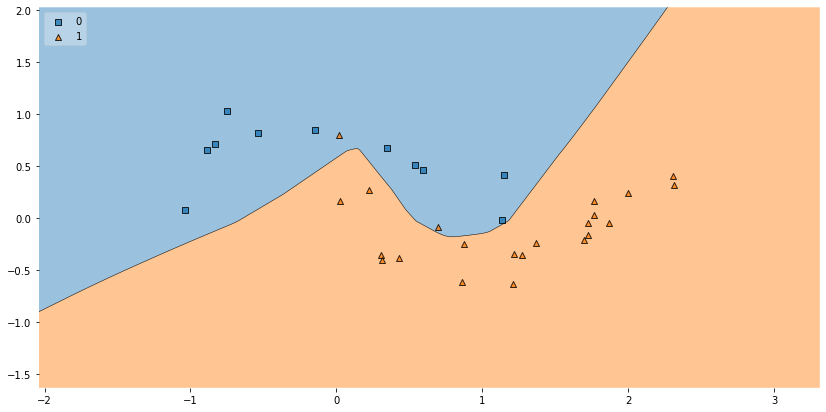

In [11]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

In [12]:
weights = model.get_weights()

In [13]:
np.max(weights[0])

0.7607508

In [14]:
np.max(weights[1])

0.68733233

# Regularized Model

In [15]:
# here we are using kernel regularization
reg_model = Sequential()
reg_model.add(Dense(500, input_dim=2, activation='relu',  kernel_regularizer='l2'))
reg_model.add(Dense(1, activation='sigmoid', kernel_regularizer='l2'))
reg_model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

In [16]:
reg_history = reg_model.fit(X_train, y_train, 
                            validation_data=(X_test, y_test), 
                            epochs=4000, verbose=0)

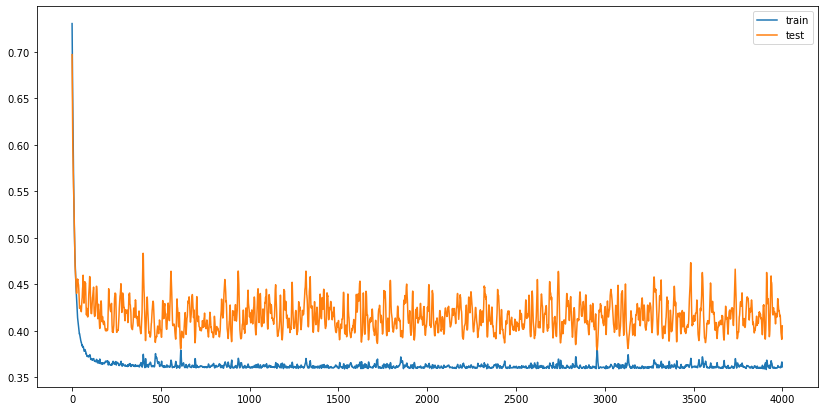

In [17]:
plt.plot(reg_history.history['loss'], label='train')
plt.plot(reg_history.history['val_loss'], label='test')
plt.legend()
plt.show()

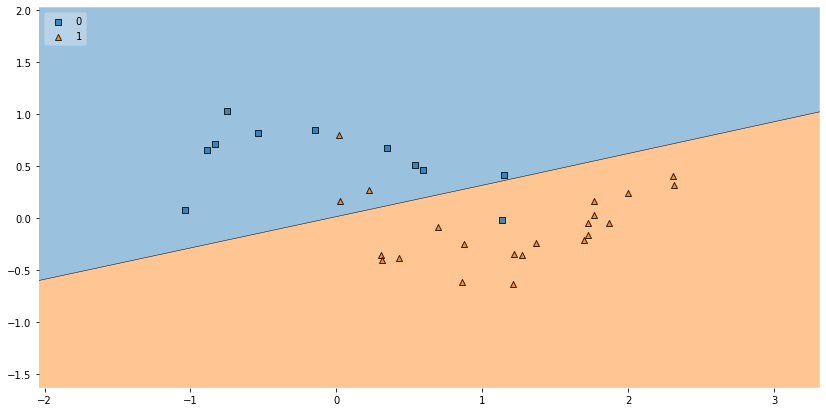

In [20]:
plot_decision_regions(X_test, y_test.ravel(), clf = reg_model, legend=2)
plt.show()

# we can see its classifieng better than the previous, May not perfrom best in training set, but the model does good in unseen data

In [21]:
reg_weights = reg_model.get_weights()

In [22]:
np.max(reg_weights[0])

0.171252

In [23]:
np.max(reg_weights[1])

0.20192856

# Conclusion

we can see after using l2 regularization, 

1. Over fitting on training data reduced
2. Weights values reduced
3. Tarining and testing losses almost same after using regularization
4. Model will perfrom good for unseen testing datasets